In [14]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt #data visualization

from sklearn.datasets import make_blobs #synthetic dataset
from sklearn.neighbors import KNeighborsClassifier #kNN classifier
from sklearn.model_selection import train_test_split #train and test sets
from sklearn.metrics import accuracy_score


In [7]:
X, y = make_blobs(n_samples=100, n_features = 2, 
                  centers = 4, cluster_std = 1.5, random_state=4)


X.shape, y.shape


((100, 2), (100,))

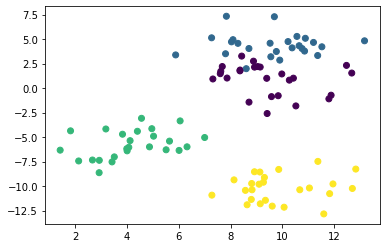

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train.shape, X_test.shape, y_train.shape



((75, 2), (25, 2), (75,))

In [15]:
knn5 = KNeighborsClassifier(n_neighbors = 5)

knn5.fit(X_train, y_train)

y_test_hat = knn5.predict(X_test)

accuracy_score(y_test_hat, y_test)



0.92

In [16]:
knn1 = KNeighborsClassifier(n_neighbors = 1)

knn1.fit(X_train, y_train)

y_test_hat = knn1.predict(X_test)

accuracy_score(y_test_hat, y_test)


0.92

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV


In [31]:
cancer_data = load_breast_cancer()

cancer_data.feature_names, cancer_data.target_names

cancer_data.data.shape, cancer_data.target.shape



((569, 30), (569,))

In [33]:
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


In [43]:

knn_grid = GridSearchCV(estimator = KNeighborsClassifier(), 
                        param_grid={'n_neighbors': np.arange(1, 20)},
                        cv = 5, scoring='accuracy')

knn_grid.fit(X_cancer, y_cancer)

knn_grid.best_params_



{'n_neighbors': 13}

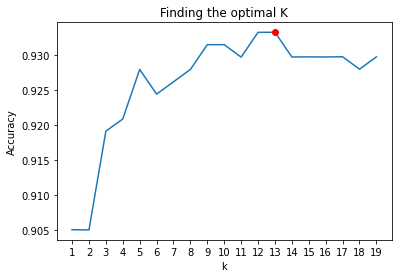

In [74]:
mean_test_score = knn_grid.cv_results_['mean_test_score']


fig, ax=plt.subplots()
ax.plot(np.arange(1, 20), mean_test_score)
ax.set_xticks(np.arange(1, 20))
ax.set_xlabel('k')
ax.set_ylabel('Accuracy')
ax.set_title('Finding the optimal K')
ax.plot([13], [mean_test_score[12]], marker='o', c='r')
plt.show()
